In [1]:
import pandas as pd
import numpy as np
import re
# from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train = pd.read_csv("training_twitter_x_y_train.csv") #10980 rows 12 cols
#test = pd.read_csv("test_twitter_x_test.csv")

In [9]:
train

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567900433542488064,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
1,569989168903819264,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)
3,568928195581513728,negative,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada)
4,568594180014014464,negative,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...
10975,569934458364813313,neutral,American,NaN,Cottopanama85,NaN,0,@AmericanAir followback,NaN,2015-02-23 10:58:58 -0800,"ohio,panama",NaN
10976,568564006329434113,positive,United,NaN,PaulBEsteves,NaN,0,@united thanks for the help. Wish the phone re...,NaN,2015-02-19 16:13:17 -0800,Brooklyn,Eastern Time (US & Canada)
10977,569643648910028801,negative,US Airways,NaN,runfixsteve,NaN,0,@usairways the. Worst. Ever. #dca #customerser...,NaN,2015-02-22 15:43:24 -0800,"St. Augustine, Florida",NaN
10978,568864981917110272,negative,US Airways,NaN,CLChicosky,NaN,0,@nrhodes85: look! Another apology. DO NOT FLY ...,NaN,2015-02-20 12:09:15 -0800,NaN,NaN


In [10]:
# Split the data into training and testing sets
train, test = train_test_split(train, test_size=0.2, random_state=42)

In [11]:
train

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
8667,570063683256242177,negative,US Airways,NaN,retardedlarry,NaN,0,@USAirways has the worst customer service line...,NaN,2015-02-23 19:32:28 -0800,NaN,NaN
292,568431120032915457,negative,Delta,NaN,Old_bauer,NaN,0,@JetBlue ruining vacations left and right. Who...,NaN,2015-02-19 07:25:14 -0800,NaN,Eastern Time (US & Canada)
10453,569699091367665664,negative,American,NaN,RachelMader2,NaN,0,@AmericanAir I need to speak to a REAL PERSON....,NaN,2015-02-22 19:23:42 -0800,NaN,NaN
9732,569645048696053761,negative,United,NaN,ImagesbyTLP,NaN,0,"@united you guys suck, 2 1/2 delay to get out ...",NaN,2015-02-22 15:48:57 -0800,earth,Pacific Time (US & Canada)
10337,568552347812524032,negative,United,NaN,johndgraham,NaN,0,@united you had us REBOARD without the captain...,NaN,2015-02-19 15:26:57 -0800,"Madison, wi",Central Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,569668606142783488,positive,Southwest,NaN,csusanto,NaN,0,@SouthwestAir #RedCarpet Southwest Companion P...,NaN,2015-02-22 17:22:34 -0800,SF Bay Area,Pacific Time (US & Canada)
5191,567782895306412032,positive,United,NaN,triathlete06,NaN,0,@united Sure did! Only waited about 15min. Yay!,NaN,2015-02-17 12:29:25 -0800,NaN,Seoul
5390,568191101087019008,negative,Southwest,NaN,travelnube,NaN,0,@SouthwestAir Please update your website,NaN,2015-02-18 15:31:29 -0800,"Chicago, IL",Central Time (US & Canada)
860,568521960088449025,neutral,Delta,NaN,kbosspotter,NaN,0,@JetBlue I can't. I don't have acces to a phon...,NaN,2015-02-19 13:26:12 -0800,Logan International Airport,Atlantic Time (Canada)


In [12]:
test

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
107,570287747643998208,negative,American,NaN,jacquelinewins6,NaN,0,@AmericanAir That's ok...You may keep my $25 a...,NaN,2015-02-24 10:22:49 -0800,NaN,NaN
5471,569416650325303297,negative,United,NaN,throthra,NaN,0,@united you can read the full story when I sub...,NaN,2015-02-22 00:41:23 -0800,NaN,NaN
9573,569474700386045955,positive,United,NaN,docambrose97,NaN,0,@united My bag reference ID number is IND43728...,NaN,2015-02-22 04:32:03 -0800,NaN,NaN
6572,569491425110466560,negative,Southwest,NaN,Tom_Fili,NaN,0,@SouthwestAir 2 hours on hold for customer ser...,NaN,2015-02-22 05:38:31 -0800,"Havertown, Pa.",Eastern Time (US & Canada)
5928,570032010145607680,neutral,American,NaN,msofka,NaN,0,@AmericanAir @jokerunning this happened to me ...,NaN,2015-02-23 17:26:36 -0800,"Cleveland, OH",Central Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...
3592,568084717481775104,negative,United,NaN,1LovePT,NaN,1,@united perhaps you could fix this? https://t....,NaN,2015-02-18 08:28:45 -0800,Canada,Eastern Time (US & Canada)
4511,569841224221392897,negative,United,NaN,NicoleIn140,NaN,0,UA3388 @united was Cancelled Flightled not del...,NaN,2015-02-23 04:48:29 -0800,"Western Massachusetts, USA",Eastern Time (US & Canada)
7700,569588473050611712,positive,American,NaN,Laurelinesblog,NaN,0,@AmericanAir Thanks! He is.,NaN,2015-02-22 12:04:09 -0800,"Chapel Hill, NC",NaN
7749,569598047593713665,positive,United,NaN,Bharrison__,NaN,0,@united this is why I fly @SouthwestAir ... Ne...,NaN,2015-02-22 12:42:11 -0800,NaN,Central Time (US & Canada)


In [13]:
print(train['negativereason_gold'].nunique())
print(train['negativereason_gold'].value_counts(),"\n")

# print(x_test.negativereason_gold.nunique())
# print(x_test.negativereason_gold.value_counts())

9
Customer Service Issue                      5
Late Flight                                 3
Cancelled Flight                            3
Can't Tell                                  2
Customer Service Issue\nCan't Tell          1
Customer Service Issue\nLost Luggage        1
Cancelled Flight\nCustomer Service Issue    1
Lost Luggage\nDamaged Luggage               1
Late Flight\nFlight Attendant Complaints    1
Name: negativereason_gold, dtype: int64 



In [14]:
!pip install nltk
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Cleaning

In [15]:
drop_cols = ['airline_sentiment_gold','name','tweet_id', 'retweet_count','tweet_created','user_timezone','tweet_coord','tweet_location']
train.drop(drop_cols, axis = 1, inplace=True)
test.drop(drop_cols, axis = 1, inplace=True)

In [16]:
stops = stopwords.words('english')
stops += list(punctuation)
stops += ['flight','airline','flights','AA']

In [17]:
abbreviations = {'ppl': 'people','cust':'customer','serv':'service','mins':'minutes','hrs':'hours','svc': 'service',
           'u':'you','pls':'please'}

train_index = train[~train.negativereason_gold.isna()].index
test_index = test[~test.negativereason_gold.isna()].index

for index, row in train.iterrows():
    tweet = row.text
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet) #remove links
    tweet = re.sub('@[^\s]+','',tweet) #remove usernames
    tweet = re.sub('[\s]+', ' ', tweet) #remove additional whitespaces
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet) #replace #word with word
    tweet = tweet.strip('\'"') #trim tweet
    words = []
    for word in tweet.split():
#         if not hasNumbers(word):
        if word.lower() not in stops:
            if word in list(abbreviations.keys()):
                words.append(abbreviations[word])
            else:
                words.append(word.lower())
    tweet = " ".join(words)
    tweet = " %s %s" % (tweet, row.airline)
    row.text = tweet
    if index in train_index:
        row.text = " %s %s" % (row.text, row.negativereason_gold)

for index, row in test.iterrows():
    tweet = row.text
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet) #remove links
    tweet = re.sub('@[^\s]+','',tweet) #remove usernames
    tweet = re.sub('[\s]+', ' ', tweet) #remove additional whitespaces
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet) #replace #word with word
    tweet = tweet.strip('\'"') #trim tweet
    words = []
    for word in tweet.split():
#         if not hasNumbers(word):
        if word.lower() not in stops:
            if word in list(abbreviations.keys()):
                words.append(abbreviations[word])
            else:
                words.append(word.lower())
    tweet = " ".join(words)
    tweet = " %s %s" % (tweet, row.airline)
    row.text = tweet
    if index in test_index:
        row.text = " %s %s" % (row.text, row.negativereason_gold)

del train['negativereason_gold']
del test['negativereason_gold']

In [18]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

for index, row in train.iterrows():
    row.text = deEmojify(row.text)

for index, row in test.iterrows():
    row.text = deEmojify(row.text)

In [19]:
def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)

for index, row in train.iterrows():
    words = row.text.split()
    new_words = []
    for word in words:
        if not hasNumbers(word):
            new_words.append(word)
    row.text = " ".join(new_words)

for index, row in test.iterrows():
    words = row.text.split()
    new_words = []
    for word in words:
        if not hasNumbers(word):
            new_words.append(word)
    row.text = " ".join(new_words)

In [20]:
train.head()


,airline_sentiment,airline,text
8667,negative,US Airways,worst customer service line. i've called times...
292,negative,Delta,ruining vacations left right. would thought ca...
10453,negative,American,need speak real person. cancelled flightled ex...
9732,negative,United,"guys suck, delay get ers even curtesy let know..."
10337,negative,United,us reboard without captain. we'll sitting anot...


In [21]:
test.head()

,airline_sentiment,airline,text
107,negative,American,"that's ok...you may keep lose bag info, longer..."
5471,negative,United,read full story submit case team pilot sleepin...
9573,positive,United,bag reference id number thanks looking it. United
6572,negative,Southwest,hours hold customer service never us sw Southwest
5928,neutral,American,happened too!!! American


## Creating vocab and data formatting

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
v = TfidfVectorizer(analyzer='word', max_features=3150, max_df = 0.8, ngram_range=(1,1))
train_features= v.fit_transform(train.text)
test_features=v.transform(test.text)

In [25]:

# Split the data into training and testing sets
train_text = train['text']
train_sentiment = train['airline_sentiment']
test_text = test['text']

# Apply TfidfVectorizer to the training and testing text
train_features = v.fit_transform(train_text)
test_features = v.transform(test_text)

# Check if the data is imbalanced
sentiment_counts = Counter(train_sentiment)
print(sentiment_counts)

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
train_features_balanced, train_sentiment_balanced = smote.fit_resample(train_features, train_sentiment)

# Count the occurrences of each sentiment class after applying SMOTE
sentiment_counts_balanced = Counter(train_sentiment_balanced)
print(sentiment_counts_balanced)


Counter({'negative': 5495, 'neutral': 1869, 'positive': 1420})
Counter({'negative': 5495, 'neutral': 5495, 'positive': 5495})


In [26]:
# Logistic Regression
clf_lr = LogisticRegression(max_iter=1000)
param_grid_lr = {'C': [0.01, 0.1, 1, 10]}
grid_search_lr = GridSearchCV(clf_lr, param_grid_lr, cv=5)
grid_search_lr.fit(train_features, train['airline_sentiment'])
best_clf_lr = grid_search_lr.best_estimator_
pred_lr = best_clf_lr.predict(test_features)

In [27]:
# Support Vector Classifier (SVC)
clf_svc = SVC(kernel='linear')
param_grid_svc = {'C': [0.01, 0.1, 1, 10]}
grid_search_svc = GridSearchCV(clf_svc, param_grid_svc, cv=5)
grid_search_svc.fit(train_features, train['airline_sentiment'])
best_clf_svc = grid_search_svc.best_estimator_
pred_svc = best_clf_svc.predict(test_features)

In [28]:
# Random Forest Classifier
clf_rf = RandomForestClassifier()
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search_rf = GridSearchCV(clf_rf, param_grid_rf, cv=5)
grid_search_rf.fit(train_features, train['airline_sentiment'])
best_clf_rf = grid_search_rf.best_estimator_
pred_rf = best_clf_rf.predict(test_features)

In [29]:
# Gradient Boosting Classifier
clf_gb = GradientBoostingClassifier()
param_grid_gb = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}
grid_search_gb = GridSearchCV(clf_gb, param_grid_gb, cv=5)
grid_search_gb.fit(train_features, train['airline_sentiment'])
best_clf_gb = grid_search_gb.best_estimator_
pred_gb = best_clf_gb.predict(test_features)

In [30]:
!pip install matplotlib seaborn

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

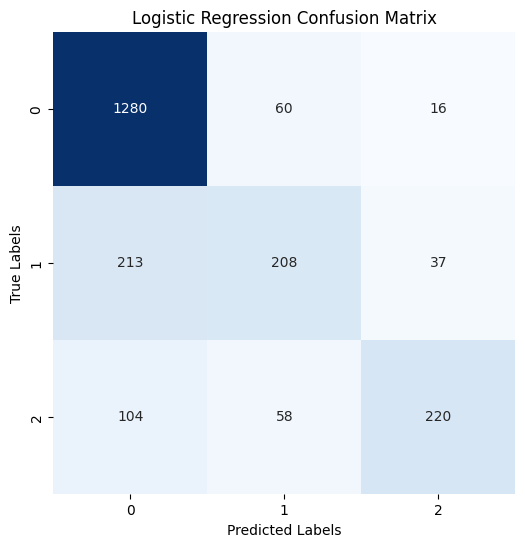

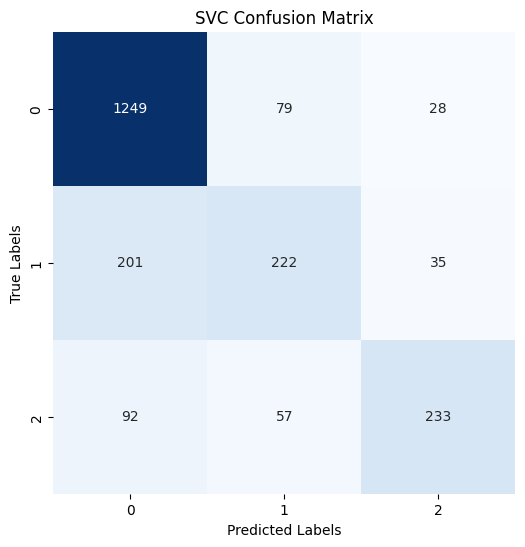

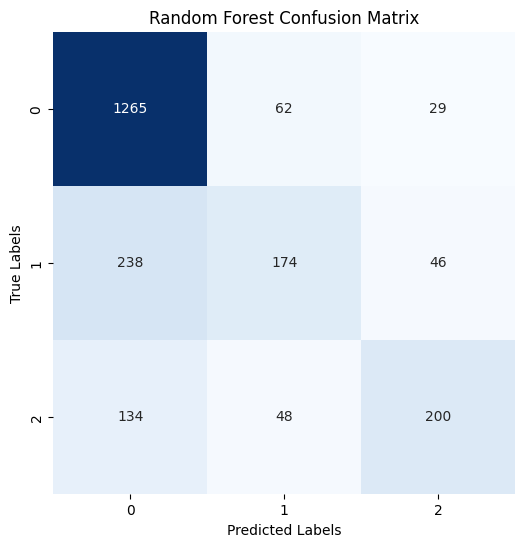

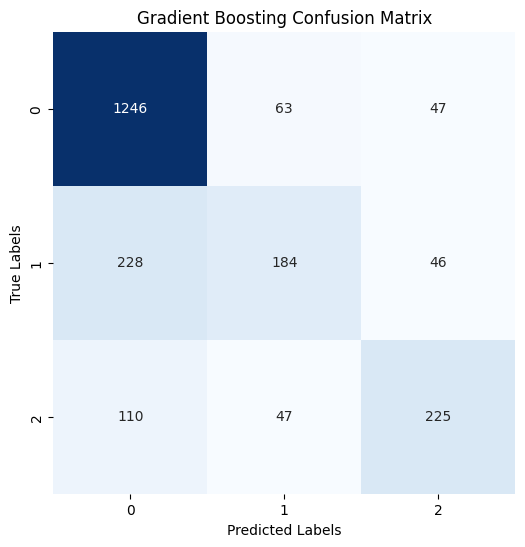

In [32]:
# Visualization
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

# Plot Confusion Matrix for each model
plot_confusion_matrix(test['airline_sentiment'], pred_lr, 'Logistic Regression')
plot_confusion_matrix(test['airline_sentiment'], pred_svc, 'SVC')
plot_confusion_matrix(test['airline_sentiment'], pred_rf, 'Random Forest')
plot_confusion_matrix(test['airline_sentiment'], pred_gb, 'Gradient Boosting')


Logistic Regression Accuracy: 0.7778
Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.94      0.87      1356
     neutral       0.64      0.45      0.53       458
    positive       0.81      0.58      0.67       382

    accuracy                           0.78      2196
   macro avg       0.75      0.66      0.69      2196
weighted avg       0.77      0.78      0.76      2196

Logistic Regression Confusion Matrix:
[[1280   60   16]
 [ 213  208   37]
 [ 104   58  220]]
SVC Accuracy: 0.7760
SVC Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.92      0.86      1356
     neutral       0.62      0.48      0.54       458
    positive       0.79      0.61      0.69       382

    accuracy                           0.78      2196
   macro avg       0.74      0.67      0.70      2196
weighted avg       0.77      0.78      0.77      2196

SVC Confusion Mat

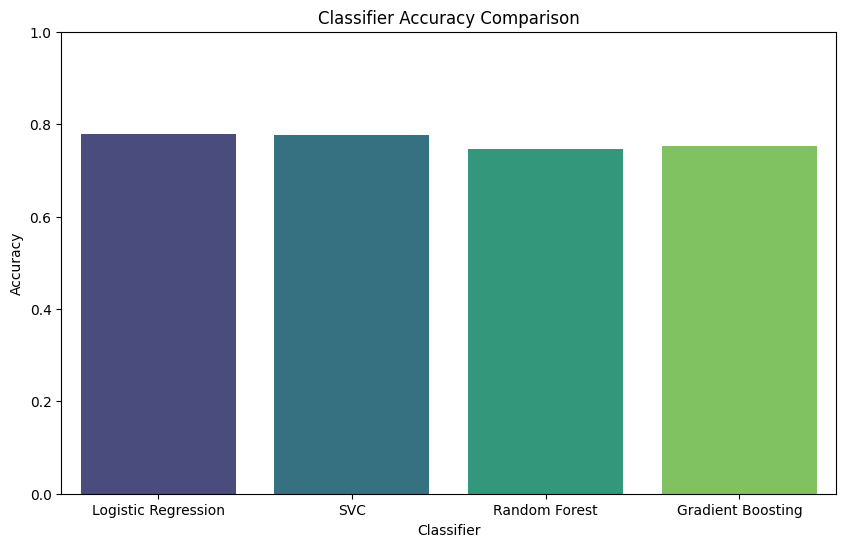

In [33]:
# Evaluation
def evaluate(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{model_name} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
    print("=" * 50)

# Evaluate all models
evaluate(test['airline_sentiment'], pred_lr, 'Logistic Regression')
evaluate(test['airline_sentiment'], pred_svc, 'SVC')
evaluate(test['airline_sentiment'], pred_rf, 'Random Forest')
evaluate(test['airline_sentiment'], pred_gb, 'Gradient Boosting')

# Compare accuracy with a bar chart
def plot_accuracy_bar_chart(models, accuracies):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=models, y=accuracies, palette='viridis')
    plt.xlabel('Classifier')
    plt.ylabel('Accuracy')
    plt.title('Classifier Accuracy Comparison')
    plt.ylim(0, 1)
    plt.show()

classifiers = ['Logistic Regression', 'SVC', 'Random Forest', 'Gradient Boosting']
accuracies = [accuracy_score(test['airline_sentiment'], pred_lr),
              accuracy_score(test['airline_sentiment'], pred_svc),
              accuracy_score(test['airline_sentiment'], pred_rf),
              accuracy_score(test['airline_sentiment'], pred_gb)]

plot_accuracy_bar_chart(classifiers, accuracies)


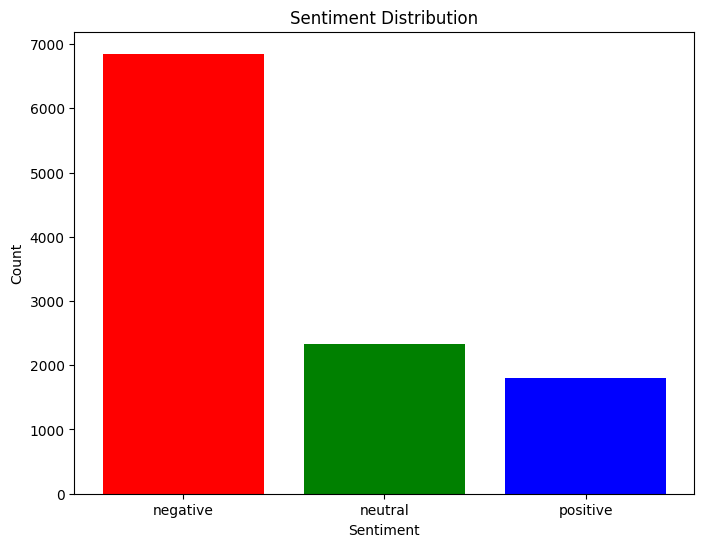

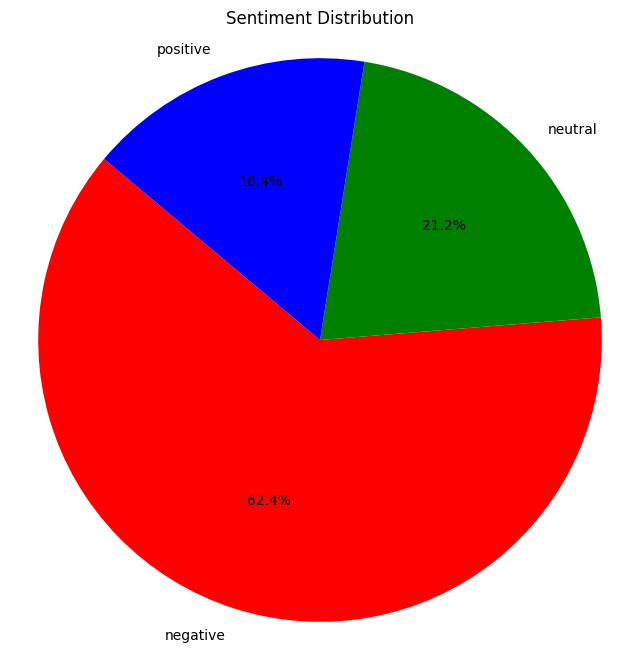

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
train = pd.read_csv("training_twitter_x_y_train.csv")

# Count the occurrences of each sentiment class
sentiment_counts = train['airline_sentiment'].value_counts()

# Create a bar chart to visualize the sentiment distribution
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'green', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

# Create a pie chart to visualize the sentiment distribution
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, colors=['red', 'green', 'blue'], autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()


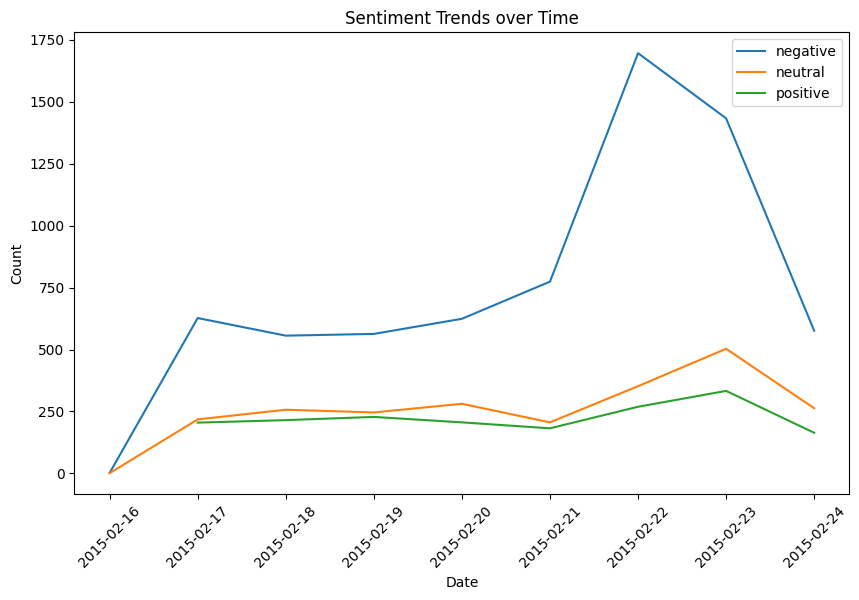

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
train = pd.read_csv("training_twitter_x_y_train.csv")

# Convert 'tweet_created' column to datetime format
train['tweet_created'] = pd.to_datetime(train['tweet_created'])

# Extract date and time information from 'tweet_created'
train['date'] = train['tweet_created'].dt.date
train['time'] = train['tweet_created'].dt.time

# Count the occurrences of each sentiment class for each date
sentiment_counts_by_date = train.groupby(['date', 'airline_sentiment']).size().unstack()

# Plot sentiment trends over time using a line chart
plt.figure(figsize=(10, 6))
for sentiment in ['negative', 'neutral', 'positive']:
    plt.plot(sentiment_counts_by_date.index, sentiment_counts_by_date[sentiment], label=sentiment)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Sentiment Trends over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()
